### Import libraries

In [78]:
import requests
import pandas
from matplotlib import pyplot

In [3]:
url = "https://www.disastercenter.com/tornado/rank.htm"

In [4]:
def write_document_from_url(url, name_document):
    response = requests.get(url)
    document = response.text
    with open(name_document, "w+") as file:
        file.write(document)  

In [5]:
#write_document_from_url(url, "ranking_tornado_risk.html")
#write_document_from_url("https://www.disastercenter.com/indiana/tornado.html", 
#"indiana_stats.html")
#write_document_from_url("https://www.disastercenter.com/mass/tornado.html", 
 #                       "massachusetts_stats.html")

In [6]:
ranking_states = pandas.read_html("ranking_tornado_risk.html", header=0)[0]
indi_stats = pandas.read_html("indiana_stats.html", header=0)[0]
mass_stats = pandas.read_html("massachusetts_stats.html", header=0)[0]

### Cleaning

In [7]:
#delete rows with total/avg
indi_stats.drop([46, 47], axis=0, inplace=bool(1))
mass_stats.drop([46, 47], axis=0, inplace=bool(1))

In [8]:
#replace values
mass_stats["Cost Adjusted"] = mass_stats["Cost Adjusted"].apply(
    lambda number:number.replace('$', ''))
mass_stats["Cost Adjusted"] = mass_stats["Cost Adjusted"].apply(
    lambda number:number.replace(',', ''))
mass_stats["Cost Adjusted"] = mass_stats["Cost Adjusted"].apply(
    lambda number:number.replace('-', '0'))
indi_stats["Cost Adjusted"] = indi_stats["Cost Adjusted"].apply(
    lambda number:number.replace('-', '0'))

In [9]:
#change column data type
mass_stats["Cost Adjusted"] = mass_stats["Cost Adjusted"].astype(int)
indi_stats["Cost Adjusted"] = indi_stats["Cost Adjusted"].astype(int)

### Ranking states

In [10]:
states = ranking_states["State"].head(15)
factor = ranking_states["Factor"].head(15)

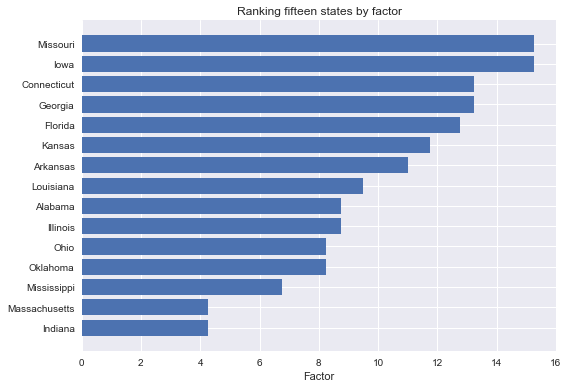

In [30]:
pyplot.barh(states, factor)
pyplot.xlabel("Factor")
pyplot.title("Ranking fifteen states by factor")
pyplot.style.use('seaborn')
pyplot.tight_layout()
pyplot.show()

,State,Factor
13,Iowa,15.25
14,Missouri,15.25
15,Tennessee,16.00
16,Texas,17.00
17,Michigan,17.25
18,Delaware,18.50
19,South Carolina,18.75
20,Kentucky,19.25


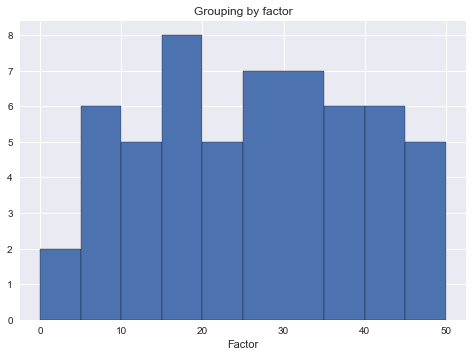

In [86]:
all_factor = ranking_states["Factor"]
bins_factor = [0,5,10,15,20,25,35,40,45,50]
pyplot.hist(all_factor, bins=bins_factor, edgecolor="black")
pyplot.title("Grouping by factor")
pyplot.xlabel("Factor")
factor_between_15_n_20 = (ranking_states["Factor"] > 15) & (ranking_states["Factor"] < 20) 
ranking_states.loc[factor_between_15_n_20, ["State", "Factor"]]

In [82]:
factor_between_25_n_35 = (ranking_states["Factor"] > 25) & (ranking_states["Factor"] <= 35) 
ranking_states.loc[factor_between_25_n_35, ["State", "Factor"]]

,State,Factor
27,South Dakota,29.75
28,Virginia,29.75
29,North Dakota,30.25
30,New Jersey,30.75
31,New York,31.25
32,Rhode Island,32.50
33,Colorado,35.00
34,West Virginia,35.00


### Massachusetts statistics

In [84]:
#greater number of tornadoes
mass_stats["Tornadoes"].nlargest(5)

8     12
6     10
22    10
13     8
20     8
Name: Tornadoes, dtype: int64

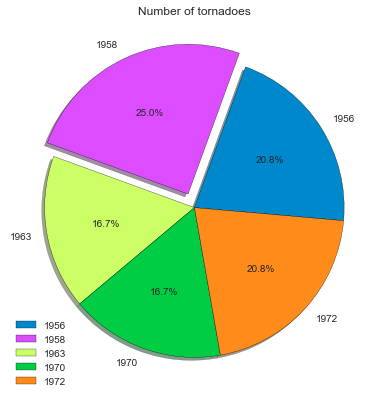

,Year,Tornadoes
6,1956,10
8,1958,12
13,1963,8
20,1970,8
22,1972,10


In [73]:
mass_tornadoes = mass_stats.iloc[[8,6,22,13,20]].sort_values(by="Year")
major_tornadoes = mass_tornadoes["Tornadoes"]
years2 = mass_tornadoes["Year"] 
porcions = [0.0, 0.1, 0.0, 0.0, 0.0]
color_picker = ["#0088cc", "#db4dff", "#ccff66", "#00cc44", "#ff8c1a"]
pyplot.pie(major_tornadoes, labels=years2, wedgeprops={"edgecolor":"black"}, autopct="%.1f%%", 
           shadow=1, explode=porcions, startangle=-5, colors=color_picker)
pyplot.tight_layout()
pyplot.title("Number of tornadoes")
pyplot.legend()
pyplot.show()
mass_tornadoes[["Year", "Tornadoes"]]

### Indiana statistics

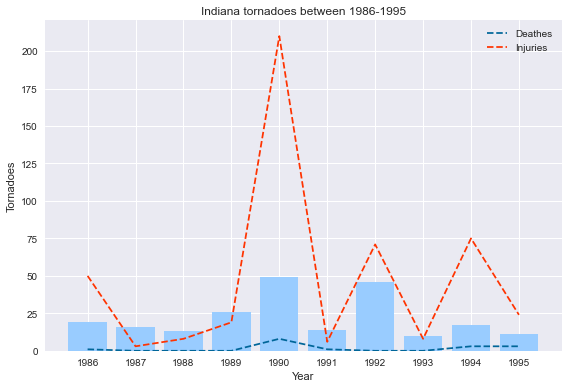

,Year,Tornadoes,Deathes,Injuries,Cost Adjusted
36,1986,19,1,50,22262832
37,1987,16,0,3,1575720
38,1988,13,0,8,2061090
39,1989,26,0,19,14883316
40,1990,49,8,210,20811456
41,1991,14,1,6,11982725
42,1992,46,0,71,19905600
43,1993,10,0,8,1436699
44,1994,17,3,75,1538459
45,1995,11,3,24,1578126


In [108]:
deathes = indi_stats["Deathes"].tail(10)
injuries = indi_stats["Injuries"].tail(10)
year = indi_stats["Year"].tail(10)
tornadoes = indi_stats["Tornadoes"].tail(10)
pyplot.plot(year, deathes, label="Deathes", linestyle='--', color="#006699")
pyplot.plot(year, injuries, label="Injuries", linestyle='--', color="#ff3300")
pyplot.bar(year, tornadoes, color="#99ccff")
pyplot.xlabel("Year")
pyplot.ylabel("Tornadoes")
pyplot.title("Indiana tornadoes between 1986-1995")
pyplot.tight_layout()
pyplot.legend()
pyplot.show()
indi_stats.tail(10)